# Testing Beamshape Package

Import Things

In [10]:
import imageio.v3 as iio
import laserbeamsize as lbs
import numpy as np

import matplotlib.pyplot as plt

Folder where images are stored 

In [11]:
repo = 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/'
repo_r = 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Red-Images/'

Pixel size - from auto calibration in ImageJ

In [12]:
pixel_size_taper = 1 / 2.8704
pixel_size = 1 / 5.4158

Going to try and replicate beam waist fit using this package!

In [13]:
# array of distances at which images were collected - tapered fibre
z1 = np.array([20.8, 19.2, 17.6, 16,  14.4, 12.8, 11.2,  9.6,  8,   6.4,  4.8,  3.2,  1.6,  0, -1.6, -3.2, -4.8 ,-6.4, -8, -9.6],dtype=float) # um

# array of filenames associated with each image
fn1 = [repo + "%dum.pgm" % number for number in z1]
fn1r = [repo_r + "%dum.pgm" % number for number in z1]

# for cleaved fibre
repo_cl = 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-12/cleaved-blue-images/'
link_cleaved_0 = repo_cl + 'blue-cleaved-0.pgm'
link_cleaved_20 = repo_cl + 'blue-cleaved-20.pgm'
link_red_cleaved_20 = repo_cl + 'red-cleaved-20.pgm'
link_red_cleaved_0 = repo_cl + 'red-cleaved-0.pgm'

print(fn1)

['C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/20um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/19um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/17um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/16um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/14um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/Confocal Work/2024-02-15/Measurements/Blue-Images/12um.pgm', 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Bac

Crop Images

In [14]:
test_img = np.array([iio.imread(fn) for fn in fn1])
red_focus = np.array(iio.imread(fn1r[13]))

blue_taper_20 = test_img[0]
blue_taper_0 = test_img[13]
blue_cleaved_20 = np.array(iio.imread(link_cleaved_20))
blue_cleaved_0 = np.array(iio.imread(link_cleaved_0))
red_cleaved_20 = np.array(iio.imread(link_red_cleaved_20))
red_cleaved_0 = np.array(iio.imread(link_red_cleaved_0))

red_taper_0 = red_focus[310:355,245:290]

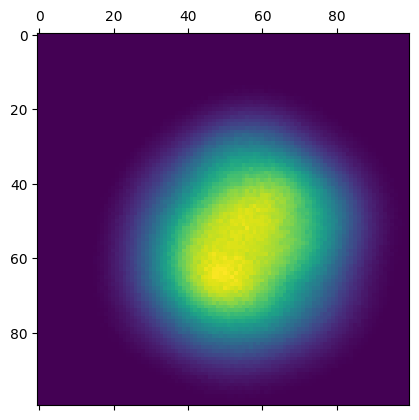

In [15]:
# Cropping images
blue_cleaved_0 = blue_cleaved_0[170:270,370:470]
red_cleaved_0 = red_cleaved_0[225:325,300:400]
blue_taper_0 = blue_taper_0[330:380,200:240]
red_taper_0 = red_taper_0[5:55,0:40]

plt.matshow(red_cleaved_0)

0.18464492780383324


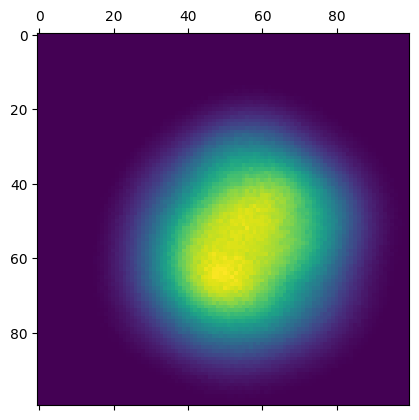

In [20]:
# Convert to microns
red_cleaved_00 = red_cleaved_0*pixel_size
blue_cleaved_0 = blue_cleaved_0*pixel_size
red_taper_0 = red_taper_0*pixel_size_taper
blue_taper_0 = blue_taper_0*pixel_size_taper

print(pixel_size)

plt.matshow(red_cleaved_00)

In [17]:
print(red_cleaved_0)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


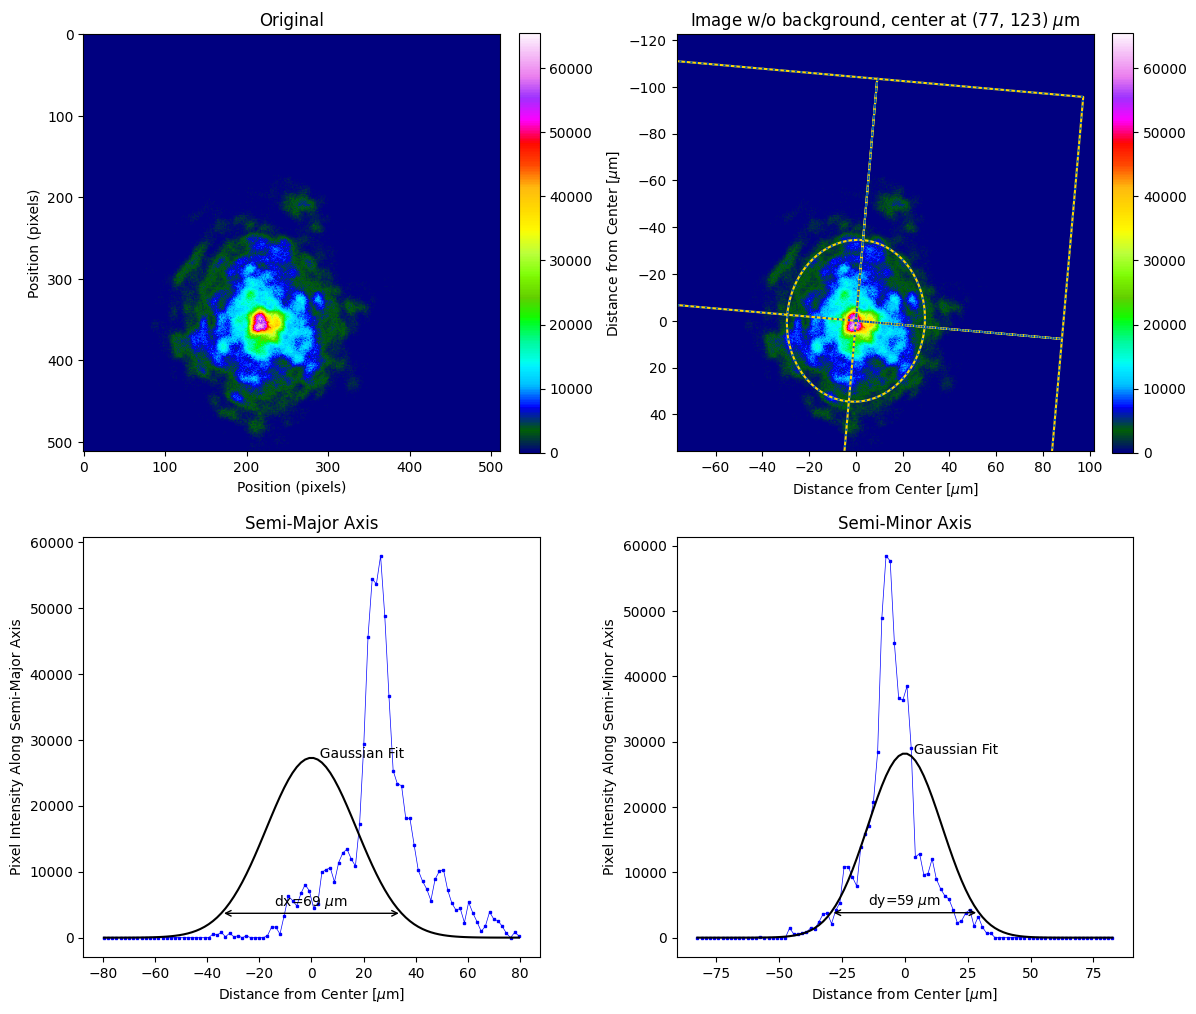

In [21]:
lbs.plot_image_analysis(blue_taper_20, pixel_size = pixel_size_taper, units = '$\mu$m')
# lbs.plot_image_analysis(blue_taper_0, pixel_size = pixel_size_μm_taper, units = '$\mu$m')
# lbs.plot_image_analysis(red_taper_0, pixel_size = pixel_size_μm_taper, units = '$\mu$m')
# lbs.plot_image_analysis(blue_cleaved_0, pixel_size = pixel_size_μm, units = '$\mu$m')

Generating Custom ColourMaps

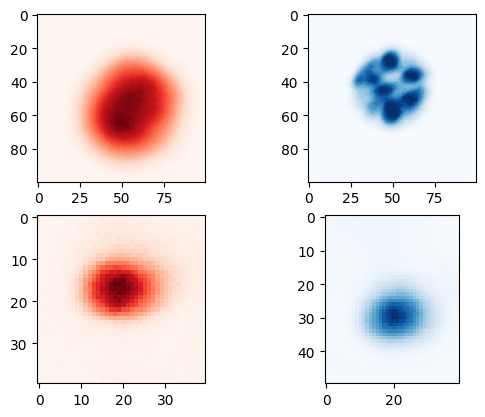

In [ ]:
import matplotlib as mpl

col = mpl.colormaps['gist_ncar'].resampled(100)

fig, ax = plt.subplots(2,2)

# Plot Images
ax[0,0].imshow(red_cleaved_0, cmap = 'Reds')
ax[0,1].imshow(blue_cleaved_0, cmap = 'Blues')
ax[1,0].imshow(red_taper_0, cmap = 'Reds')
ax[1,1].imshow(blue_taper_0, cmap = 'Blues')

# X, Y lims
